In [1]:
using Pkg
Pkg.rm("PartonDensity")
Pkg.add(url="https://github.com/cescalara/PartonDensity.jl.git")
using BAT, DensityInterface
using PartonDensity
using QCDNUM
using Plots, Random, Distributions, ValueShapes, ParallelProcessingTools
using StatsBase, LinearAlgebra
using SpecialFunctions, Printf
const sf = SpecialFunctions;
using DelimitedFiles
using LaTeXStrings
using HypothesisTests
gr(fmt=:png);

┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36


In [2]:
import HDF5
samples = bat_read("/Users/AllenCCaldwell/F2/Dirichlet-DataFit/Data-Dirichlet-sysrun-priors-tight.h5").result

DensitySampleVector, StructArray with 5 columns and 168513 rows:
      v                       logd      weight  info                    aux
    ┌──────────────────────────────────────────────────────────────────────────
 1  │ (θ = [0.334723, 0.143…  -1152.2   7       MCMCSampleID(6, 5, 0,…  nothing
 2  │ (θ = [0.332959, 0.150…  -1154.46  7       MCMCSampleID(6, 5, 7,…  nothing
 3  │ (θ = [0.333761, 0.140…  -1152.76  5       MCMCSampleID(6, 5, 14…  nothing
 4  │ (θ = [0.331327, 0.151…  -1151.23  3       MCMCSampleID(6, 5, 19…  nothing
 5  │ (θ = [0.334947, 0.144…  -1151.49  12      MCMCSampleID(6, 5, 22…  nothing
 6  │ (θ = [0.338786, 0.128…  -1152.16  12      MCMCSampleID(6, 5, 34…  nothing
 7  │ (θ = [0.337653, 0.121…  -1154.28  18      MCMCSampleID(6, 5, 46…  nothing
 8  │ (θ = [0.336982, 0.115…  -1155.81  6       MCMCSampleID(6, 5, 64…  nothing
 9  │ (θ = [0.335858, 0.118…  -1155.9   1       MCMCSampleID(6, 5, 70…  nothing
 10 │ (θ = [0.341771, 0.101…  -1154.81  11      MCMCSampleI

In [3]:
pdf_params_gen, sim_data = pd_read_sim("/Users/AllenCCaldwell/F2/Dirichlet-referencefit/simulation-Dirichlet.h5")
nbins=sim_data["nbins"]
counts_obs_ep_sim= sim_data["counts_obs_ep"]
counts_obs_em_sim= sim_data["counts_obs_em"]


counts_obs_ep_data = readdlm("/Users/AllenCCaldwell/F2/PartonDensity/eP.dat") 
counts_obs_em_data = readdlm("/Users/AllenCCaldwell/F2/PartonDensity/eM.dat") 

153×1 Matrix{Float64}:
 810.0
 589.0
 487.0
 517.0
 399.0
 349.0
 325.0
 904.0
 804.0
 749.0
 622.0
 570.0
 570.0
   ⋮
  80.0
  51.0
  71.0
  49.0
  43.0
  25.0
  11.0
   6.0
   9.0
   2.0
 183.0
  16.0

0.00019953
0.00016954
0.00019447
1.7525000000000006e-5
1.7525000000000006e-5
1.7525000000000006e-5
0.002478736000000001


┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
└ @ BAT /Users/AllenCCaldwell/.julia/packages/BAT/f4aNp/src/algotypes/bat_default.jl:44


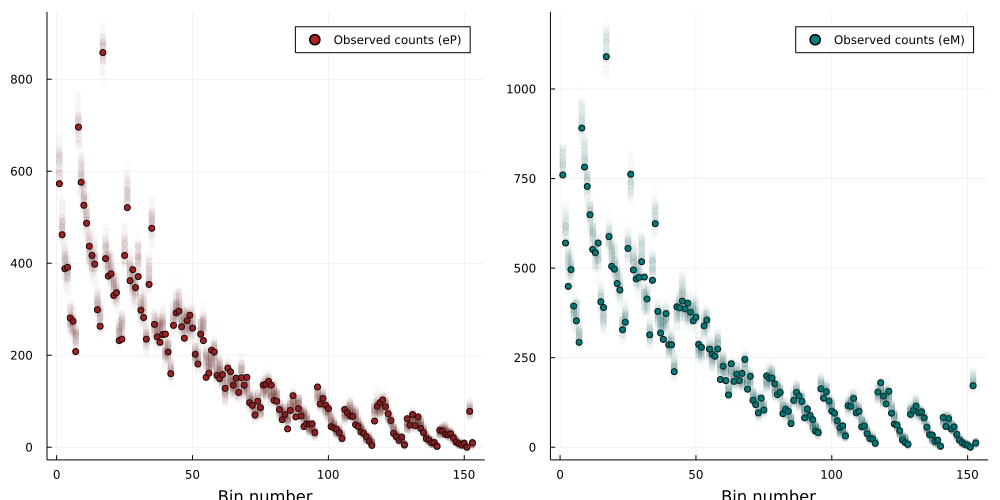

In [4]:
qcdnum_grid = QCDNUMGrid(x_min=[1.0e-3, 1.0e-1, 5.0e-1], x_weights=[1, 2, 2], nx=100,
                         qq_bounds=[1.0e2, 3.0e4], qq_weights=[1.0, 1.0], nq=50, spline_interp=3)
qcdnum_params = QCDNUMParameters(order=2, α_S=0.118, q0=100.0, grid=qcdnum_grid,
                                 n_fixed_flav=5, iqc=1, iqb=1, iqt=1, weight_type=1);
# now SPLINT and quark coefficients
splint_params = SPLINTParameters();
quark_coeffs = QuarkCoefficients();
dp1=plot_data_space_sysErr(pdf_params_gen, sim_data, samples, qcdnum_grid, qcdnum_params, 
                splint_params, quark_coeffs)

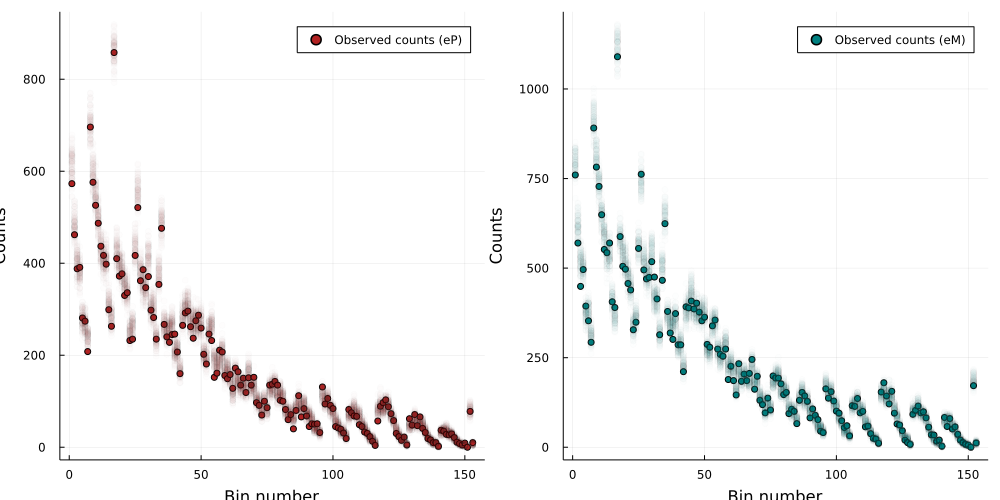

In [5]:
plot(dp1,ylabel="Counts",    label=L"Observed counts e$^+$p")

In [6]:
savefig("DataSpace.pdf")